### Benchmarking on PXD020248

#### HepG2 cell lines are treated with DMSO and BaP separately, and LFQ and TMT quantfication method were used. Six biological replicates were prepared.

In [1]:
%load_ext rpy2.ipython

C:\Users\ChengXin\MyProgram\python\anaconda\pro\lib\site-packages\rpy2\robjects\packages.py:367: UserWarning: The symbol 'quartz' is not in this R namespace/package.
  "The symbol '%s' is not in this R namespace/package." % name


In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
%%R
data_folder = '../datasets/PXD020248'
setwd(data_folder)

In [4]:
quantmstmt = pd.read_csv("./TMT/out_msstats.csv", sep=',', header=0)
quantmstmt = quantmstmt[-quantmstmt['ProteinName'].str.contains("DECOY_")]
print(len(set(quantmstmt['ProteinName'])))
quantmstmt.head()

4173


,RetentionTime,ProteinName,PeptideSequence,Charge,Channel,Condition,BioReplicate,Run,Mixture,TechRepMixture,Fraction,Intensity,Reference
0,3463.07322,sp|P36578|RL4_HUMAN,.(TMT6plex)AAAAAAALQAK(TMT6plex),3,4,BaP,4,1_1_1,1,1_1,1,182447.1,20200103_HepG2_sp3_TMT_BP123_F1.mzML_controlle...
1,3463.07322,sp|P36578|RL4_HUMAN,.(TMT6plex)AAAAAAALQAK(TMT6plex),3,5,BaP,5,1_1_1,1,1_1,1,215217.2,20200103_HepG2_sp3_TMT_BP123_F1.mzML_controlle...
2,3463.07322,sp|P36578|RL4_HUMAN,.(TMT6plex)AAAAAAALQAK(TMT6plex),3,6,BaP,6,1_1_1,1,1_1,1,139054.2,20200103_HepG2_sp3_TMT_BP123_F1.mzML_controlle...
3,3463.07322,sp|P36578|RL4_HUMAN,.(TMT6plex)AAAAAAALQAK(TMT6plex),3,1,Control,1,1_1_1,1,1_1,1,185305.6,20200103_HepG2_sp3_TMT_BP123_F1.mzML_controlle...
4,3463.07322,sp|P36578|RL4_HUMAN,.(TMT6plex)AAAAAAALQAK(TMT6plex),3,2,Control,2,1_1_1,1,1_1,1,201101.7,20200103_HepG2_sp3_TMT_BP123_F1.mzML_controlle...


In [5]:
quantmslfq = pd.read_csv("./LFQ/MBR/out_msstats.csv", sep=',', header=0)
quantmslfq = quantmslfq[-quantmslfq['ProteinName'].str.contains("DECOY_")]
print(len(set(quantmslfq['ProteinName'])))
quantmslfq.head()

5374


,ProteinName,PeptideSequence,PrecursorCharge,FragmentIon,ProductCharge,IsotopeLabelType,Condition,BioReplicate,Run,Fraction,Intensity,Reference
0,sp|Q86U42|PABP2_HUMAN,.(Acetyl)AAAAAAAAAAGAAGGR,2,NaN,0,L,BaP,1,1,1,471047100.0,20191219_HepG2_sp3_LFQ_BaP_BP1_F1.mzML
1,sp|Q86U42|PABP2_HUMAN,.(Acetyl)AAAAAAAAAAGAAGGR,2,NaN,0,L,BaP,5,10,2,37622060.0,20191219_HepG2_sp3_LFQ_BaP_BP5_F2.mzML
2,sp|Q86U42|PABP2_HUMAN,.(Acetyl)AAAAAAAAAAGAAGGR,2,NaN,0,L,BaP,6,11,1,644261900.0,20191219_HepG2_sp3_LFQ_BaP_BP6_F1.mzML
3,sp|Q86U42|PABP2_HUMAN,.(Acetyl)AAAAAAAAAAGAAGGR,2,NaN,0,L,BaP,6,12,2,16262000.0,20191219_HepG2_sp3_LFQ_BaP_BP6_F2.mzML
4,sp|Q86U42|PABP2_HUMAN,.(Acetyl)AAAAAAAAAAGAAGGR,2,NaN,0,L,Control,7,13,1,290965200.0,20191219_HepG2_sp3_LFQ_DMSO_BP1_F1.mzML


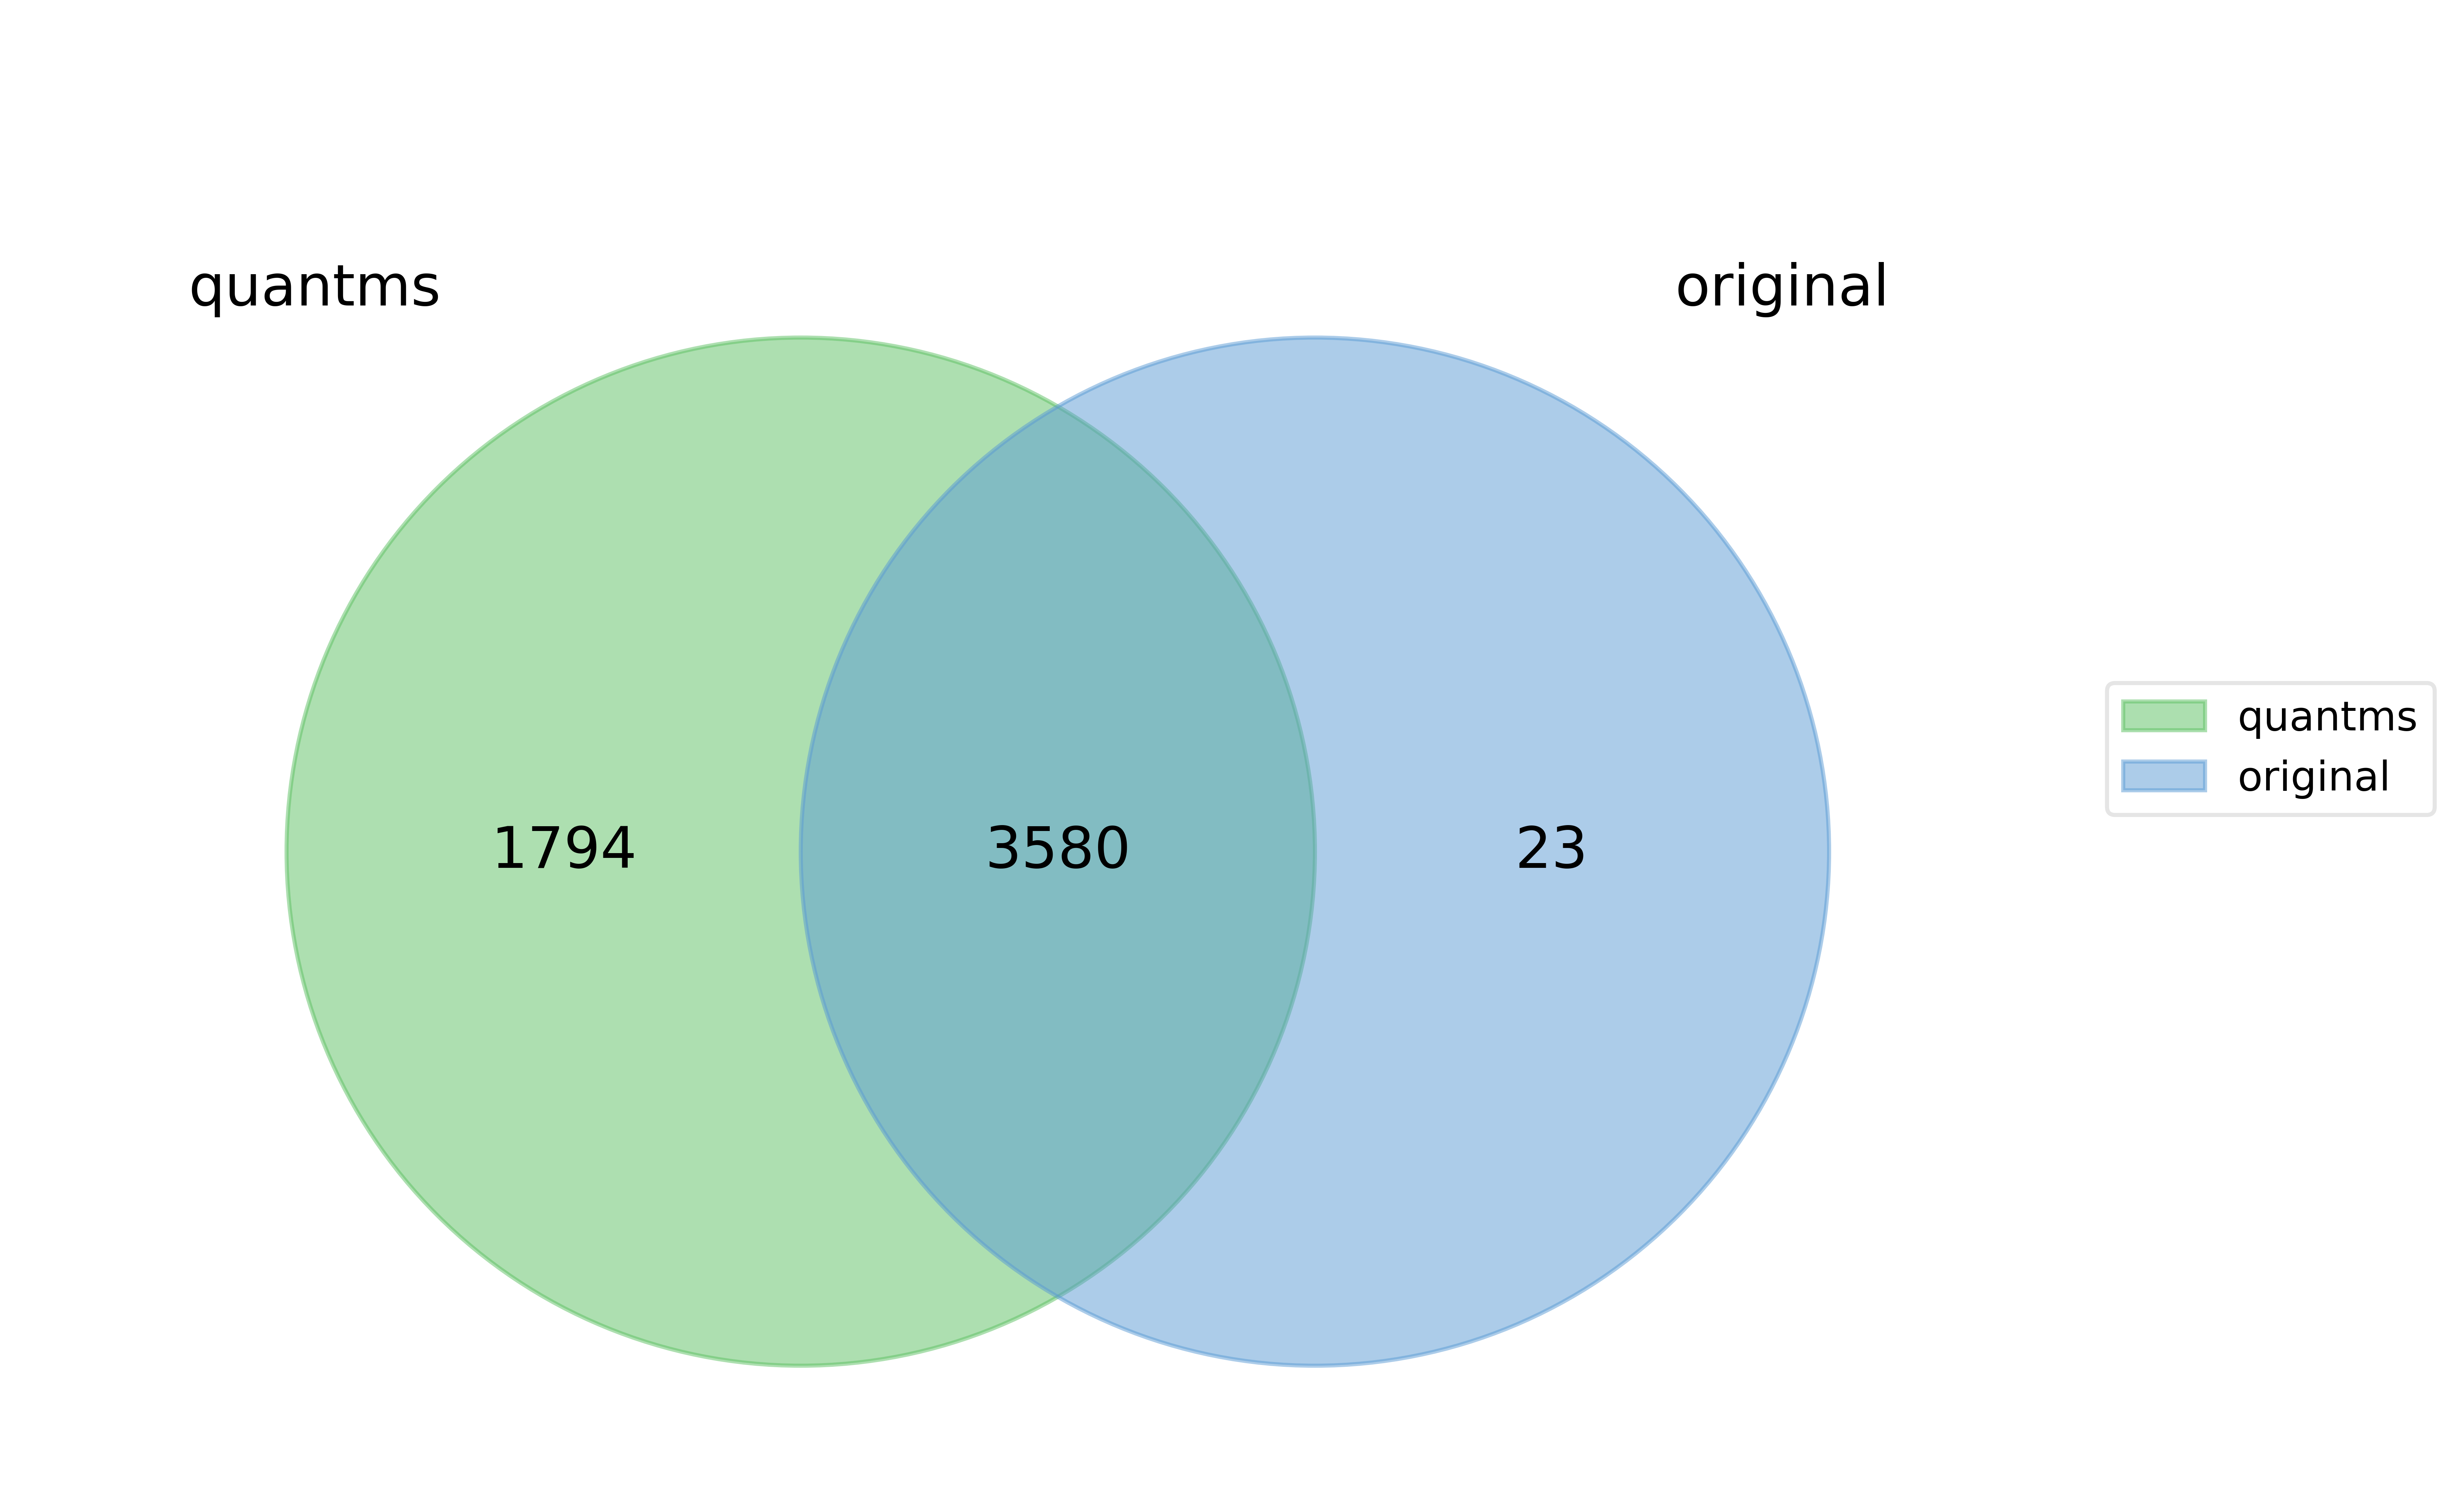

In [6]:
from pyvenn import venn
# read the original result
OriginalResultlfq = pd.read_excel("./1-s2.0-S0300483X20302912-mmc2.xlsx", sheet_name="sTable 1", header=3)
quantmslfq["ProteinEntry"] = quantmslfq.apply(lambda x: ";".join(x.ProteinName.split("|")[1::2]), axis=1)

labels = venn.get_labels([set(quantmslfq["ProteinEntry"]), set(OriginalResultlfq['Accession'])], fill=['number'])
fig, ax = venn.venn2(labels, names=['quantms', 'original'], dpi=800)

plt.show()


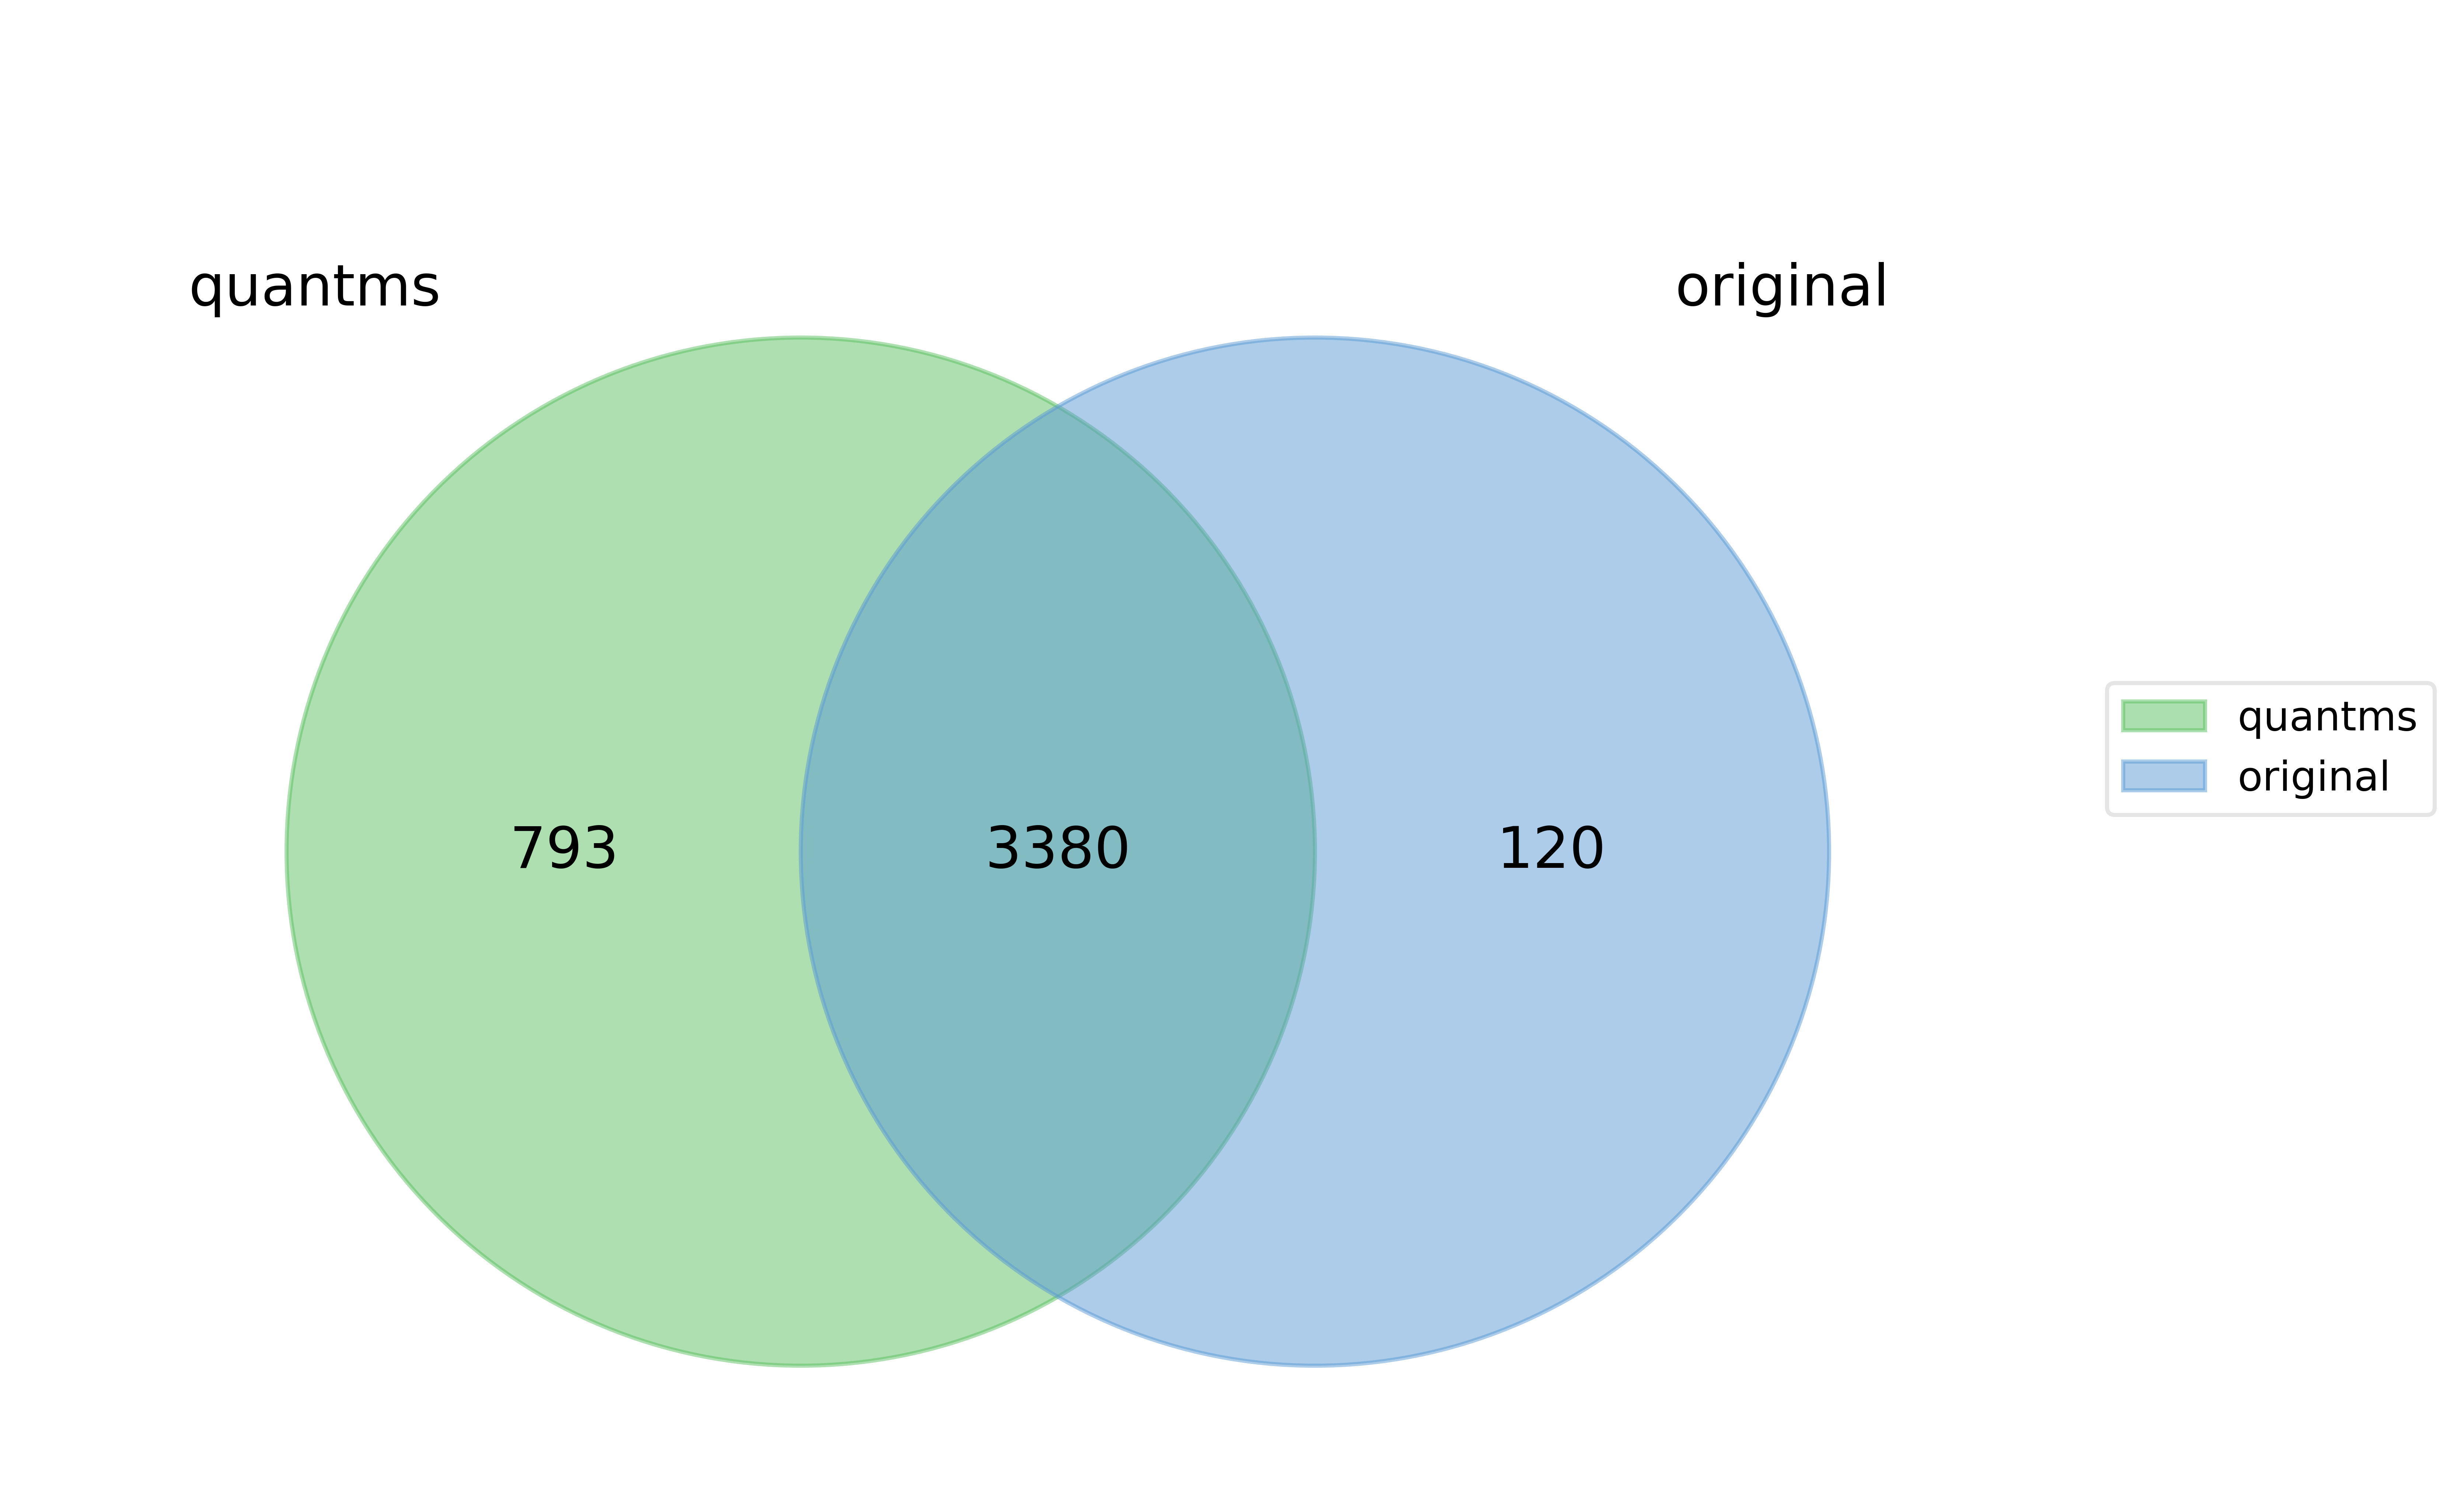

In [10]:
from pyvenn import venn
# read the original result
OriginalResultmt = pd.read_excel("./1-s2.0-S0300483X20302912-mmc2.xlsx", sheet_name="sTable 2", header=3)
quantmstmt["ProteinEntry"] = quantmstmt.apply(lambda x: ";".join(x.ProteinName.split("|")[1::2]), axis=1)

labels = venn.get_labels([set(quantmstmt["ProteinEntry"]), set(OriginalResultmt['Accession'])], fill=['number'])
fig, ax = venn.venn2(labels, names=['quantms', 'original'], dpi=800 )
plt.show()

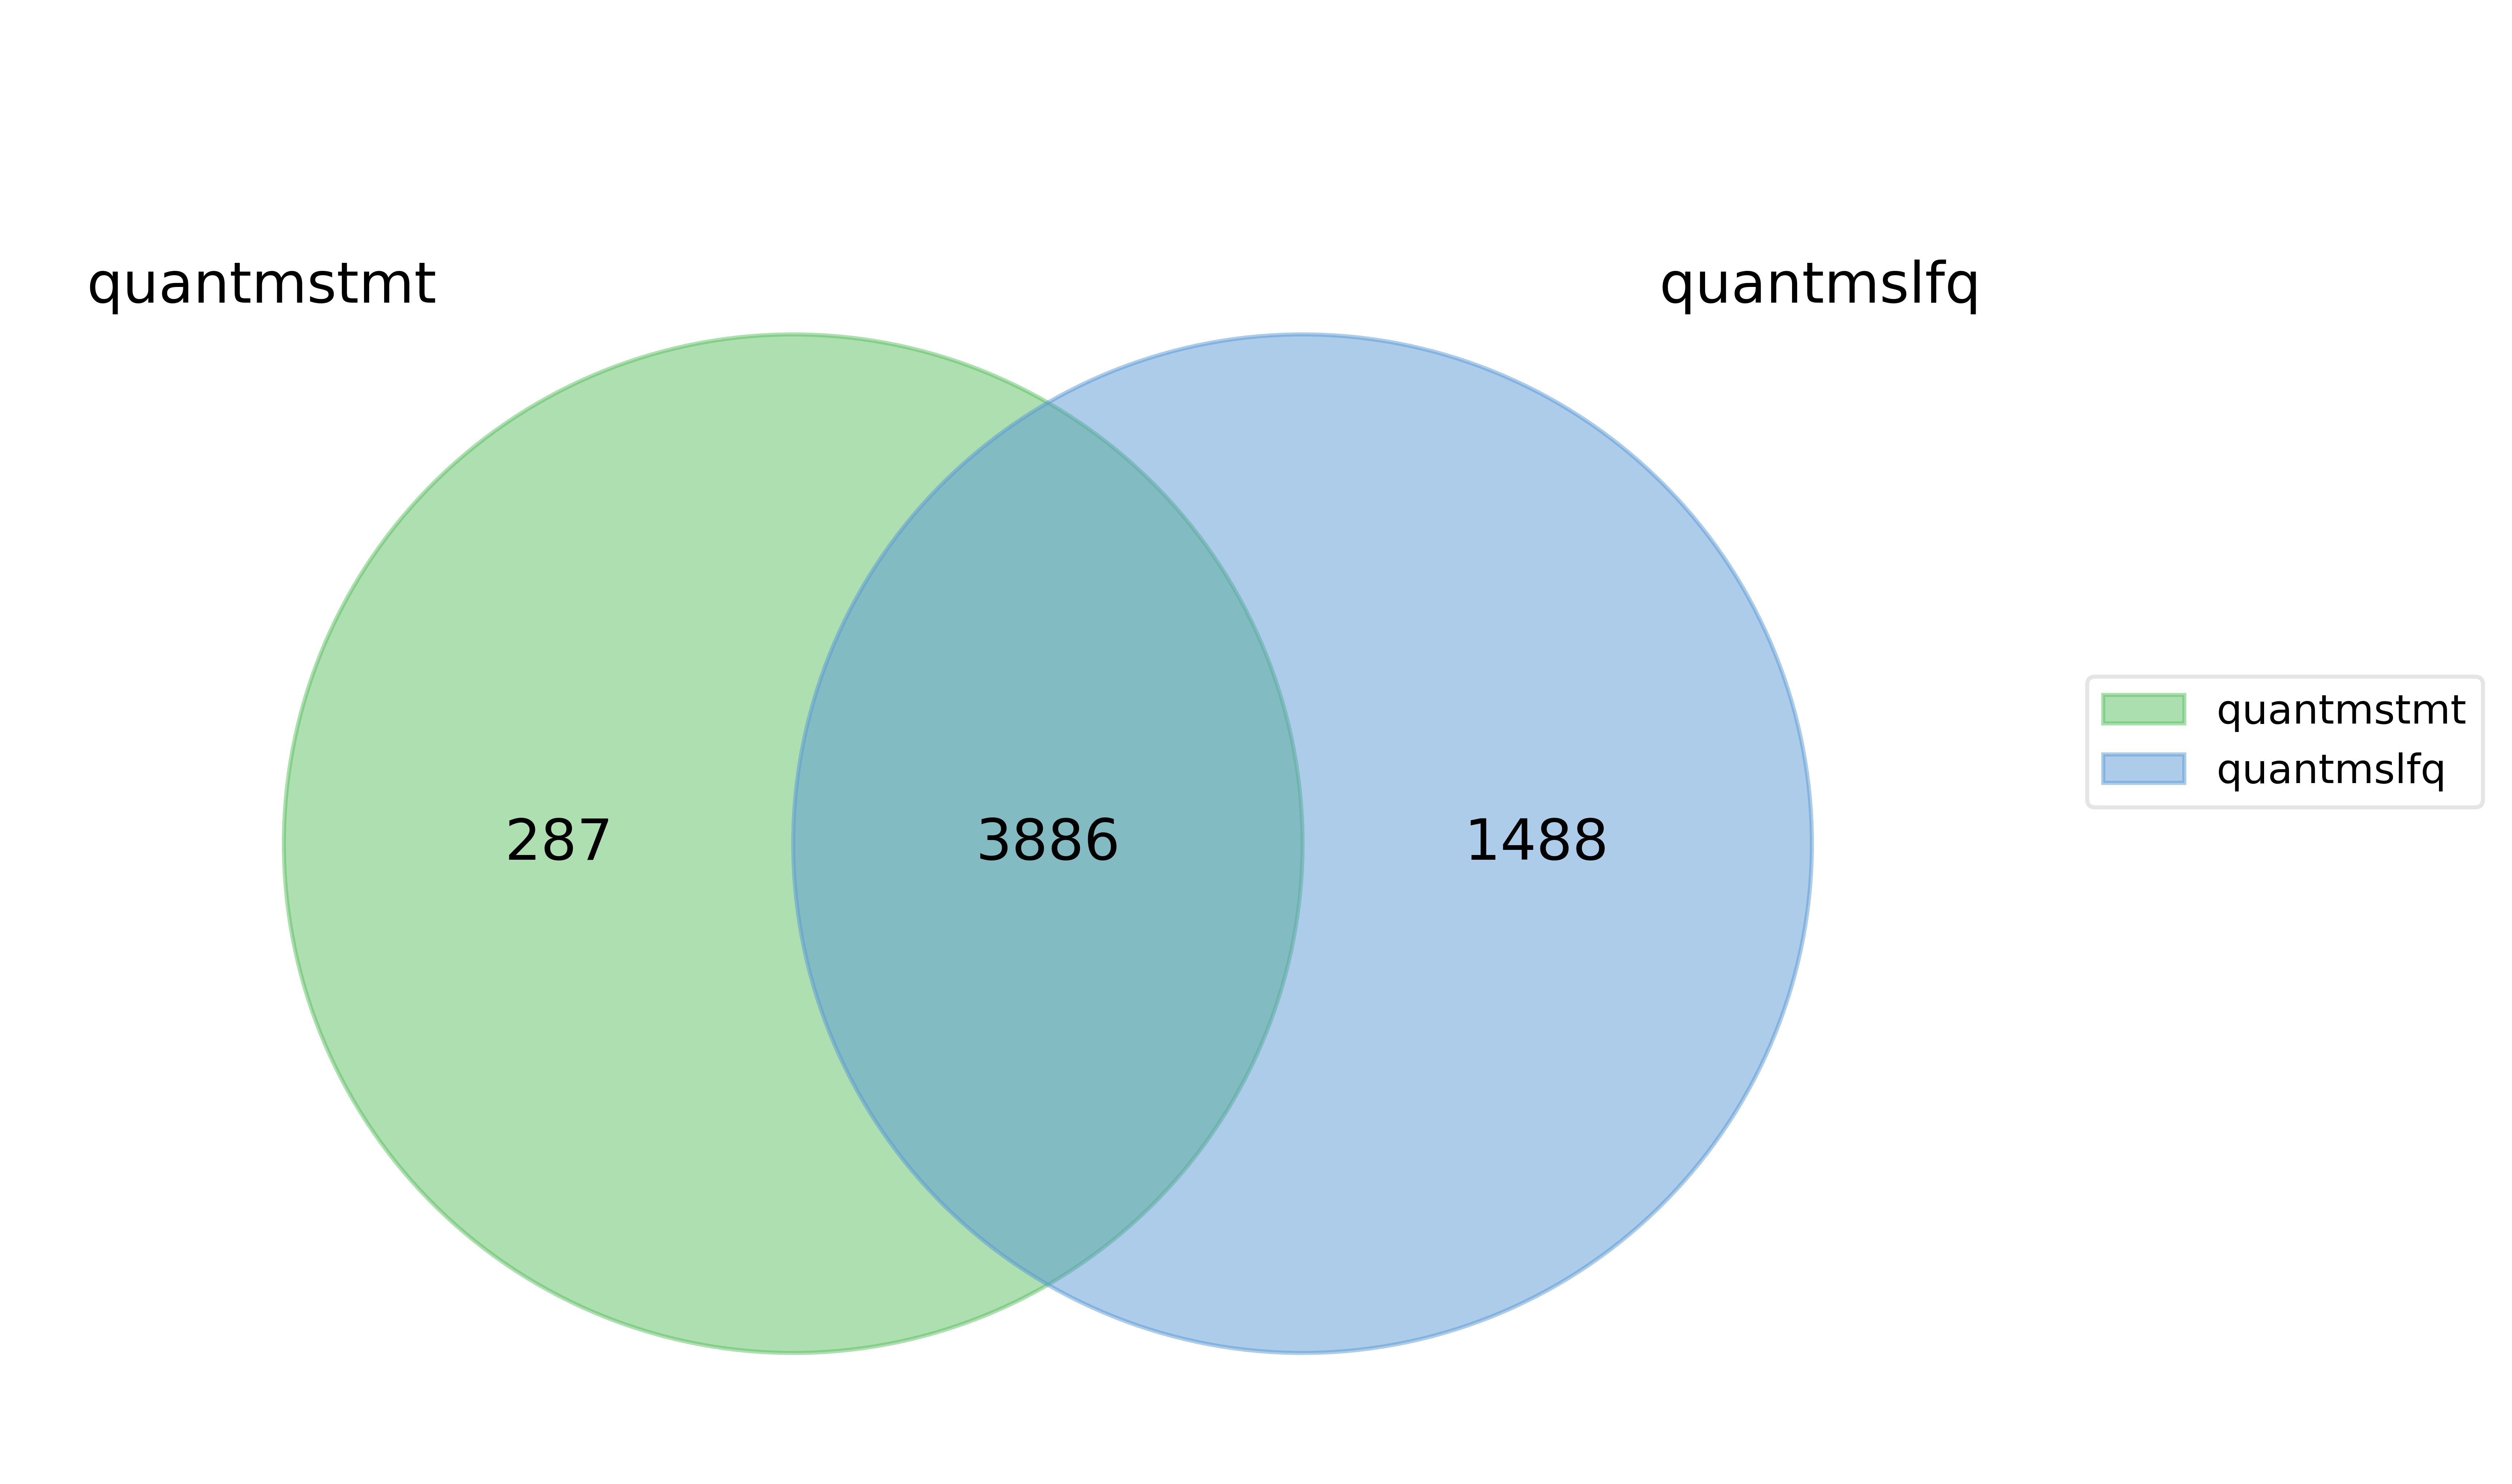

In [8]:
labels = venn.get_labels([set(quantmstmt["ProteinName"]), set(quantmslfq['ProteinName'])], fill=['number'])
fig, ax = venn.venn2(labels, names=['quantmstmt', 'quantmslfq'], dpi=800)
plt.show()


### LFQ Analysis

In [6]:
%%R -w 800 -h 600

library('MSstats', warn.conflicts = F, quietly = T, verbose = F)

protein_expression = './LFQ/MBR/protein_expression.csv'

raw.om <- read.csv('./LFQ/MBR/out_msstats.csv', header = TRUE, sep = ',')
raw.om <- raw.om[!grepl("DECOY", raw.om$ProteinName),]

quantms.proposed <- MSstats::dataProcess(raw = raw.om,
                                           normalization = 'equalizeMedians',
                                           summaryMethod = 'TMP',
                                           censoredInt = "NA",
                                           MBimpute = TRUE)

# Write the expression protein log values into the expression csv 
head(quantms.proposed$ProteinLevelData)
Protein.Expression <- quantms.proposed$ProteinLevelData[, c('Protein', 'LogIntensities', 'GROUP')]
head(Protein.Expression)
write.csv(Protein.Expression, file=protein_expression, row.names=FALSE)


INFO  [2021-12-20 08:58:35] ** Multiple fractionations exist: 2 fractionations per MS replicate.
INFO  [2021-12-20 08:59:38] ** Features with one or two measurements across runs are removed.
INFO  [2021-12-20 08:59:38] ** Fractionation handled.
INFO  [2021-12-20 08:59:39] ** Updated quantification data to make balanced design. Missing values are marked by NA
INFO  [2021-12-20 08:59:43] ** Log2 intensities under cutoff = 18.223  were considered as censored missing values.
INFO  [2021-12-20 08:59:43] ** Log2 intensities = NA were considered as censored missing values.
INFO  [2021-12-20 08:59:43] ** Use all features that the dataset originally has.
INFO  [2021-12-20 08:59:45] 
 # proteins: 4713
 # peptides per protein: 1-234
 # features per peptide: 1-1
INFO  [2021-12-20 08:59:45] Some proteins have only one feature: 
 sp|A0A0U1RR11|CENL1_HUMAN;sp|A0A0U1RRI6|CENL3_HUMAN;sp|P0DPI3|CENL2_HUMAN,
 sp|A0FGR8|ESYT2_HUMAN,
 sp|A0PJW6|TM223_HUMAN,
 sp|A2RTX5|SYTC2_HUMAN,
 sp|A5D8V6|VP37C_HUMAN ..

In [16]:
%%R 

head(quantms.proposed$ProteinLevelData)

  RUN                                         Protein LogIntensities
1   1 sp|A0A0B4J2D5|GAL3B_HUMAN;sp|P0DPI2|GAL3A_HUMAN       25.13935
2   2 sp|A0A0B4J2D5|GAL3B_HUMAN;sp|P0DPI2|GAL3A_HUMAN       25.35618
3   3 sp|A0A0B4J2D5|GAL3B_HUMAN;sp|P0DPI2|GAL3A_HUMAN       25.28180
4   4 sp|A0A0B4J2D5|GAL3B_HUMAN;sp|P0DPI2|GAL3A_HUMAN       25.05243
5   5 sp|A0A0B4J2D5|GAL3B_HUMAN;sp|P0DPI2|GAL3A_HUMAN       25.44349
6   6 sp|A0A0B4J2D5|GAL3B_HUMAN;sp|P0DPI2|GAL3A_HUMAN       25.11651
      originalRUN GROUP SUBJECT TotalGroupMeasurements NumMeasuredFeature
1  BaP_1_1_merged   BaP       1                     42                  5
2  BaP_2_3_merged   BaP       2                     42                  5
3  BaP_3_5_merged   BaP       3                     42                  6
4  BaP_4_7_merged   BaP       4                     42                  5
5  BaP_5_9_merged   BaP       5                     42                  7
6 BaP_6_11_merged   BaP       6                     42                  6

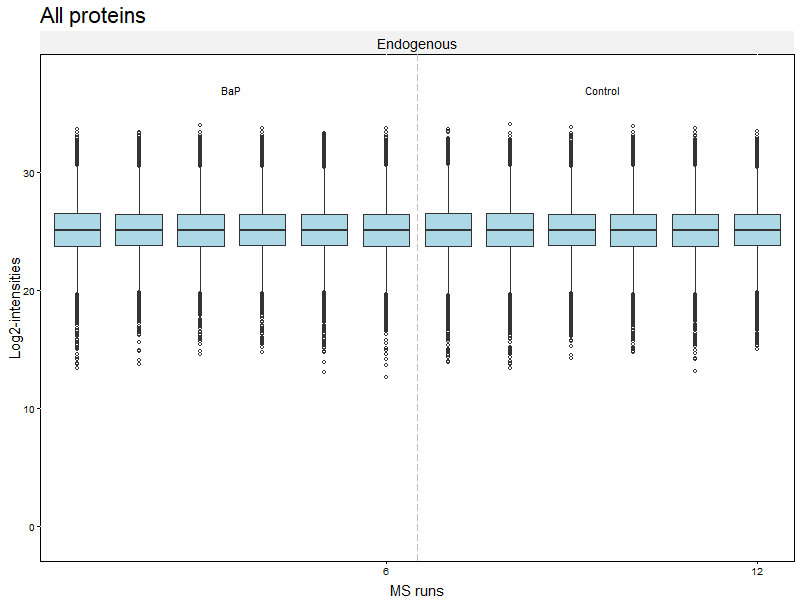

In [14]:
%%R -w 800 -h 600
tmp <- levels(quantms.proposed$ProcessedData$PROTEIN)
selector <- append('allonly', tmp, 1)
dataProcessPlots(data = quantms.proposed, type="QCPlot",which.Protein=selector,width=10, height=5, address=FALSE)

[1] "sp|O95399|UTS2_HUMAN"
  |========                                                              |  11%


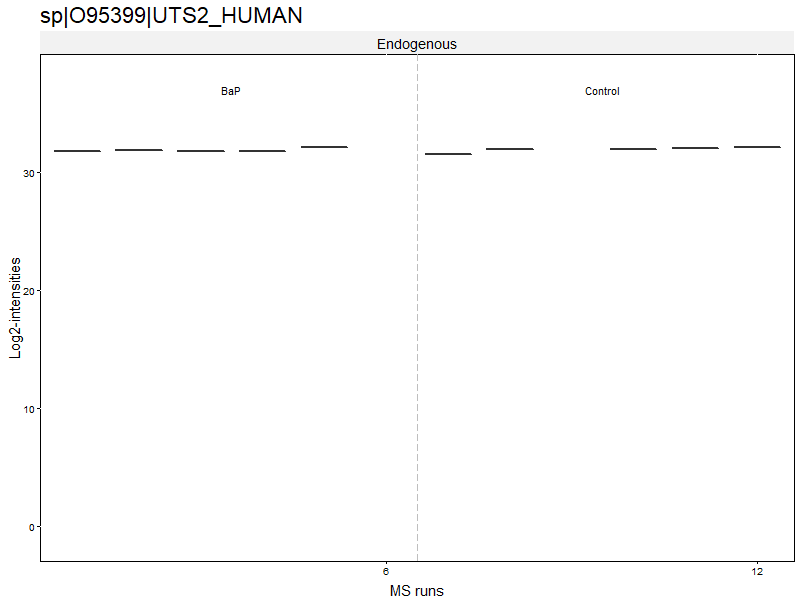

In [15]:
%%R -w 800 -h 600

Protein.Expression2 <- Protein.Expression[order(Protein.Expression$LogIntensities,decreasing = TRUE),]
protein_accession <- as.character(Protein.Expression2$Protein[1])
print(protein_accession)
tmp <- levels(quantms.proposed$ProcessedData$PROTEIN)
selector <- append(protein_accession, tmp, 1)
dataProcessPlots(data = quantms.proposed, type="QCPlot",which.Protein=selector,width=10, height=5, address=FALSE)


  |======================================================================| 100%
  |======================================================================| 100%


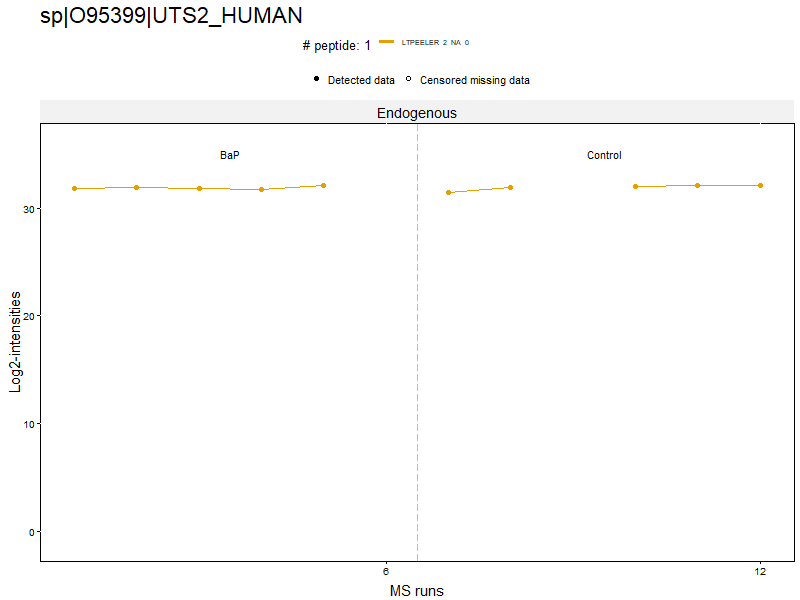

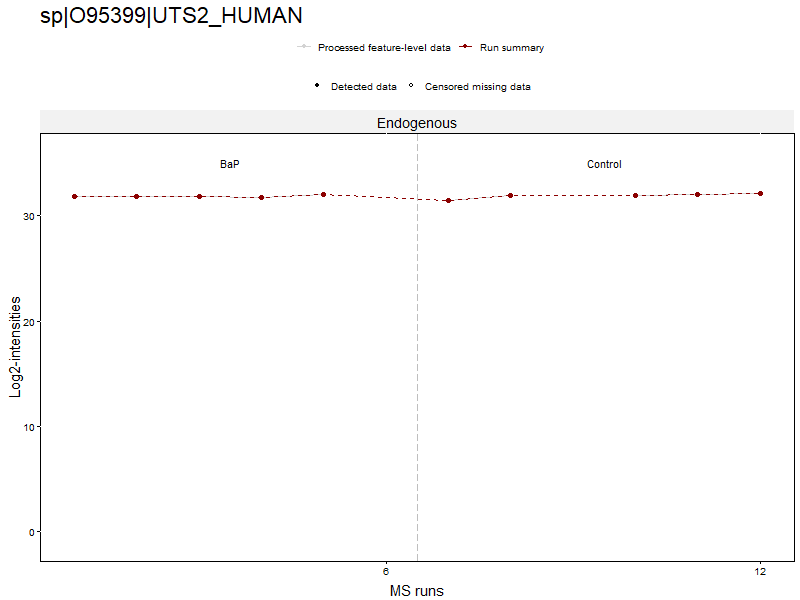

In [16]:
%%R -w 800 -h 600

tmp <- levels(quantms.proposed$ProcessedData$PROTEIN)
selector <- append(protein_accession, tmp, 1)
dataProcessPlots(data = quantms.proposed, type="ProfilePlot",which.Protein=selector,width=10, height=5, address=FALSE)


In [8]:
%%R

ac_groups = levels(quantms.proposed$FeatureLevelData$GROUP)
groups = levels(quantms.proposed$ProteinLevelData$GROUP)
print(ac_groups)

[1] "BaP"     "Control"


In [9]:
%%R

comparison_matrix = c(1, -1)
comparison <- matrix(comparison_matrix, nrow=1)

colnames(comparison) <- groups[order(as.numeric(groups))]
row.names(comparison) <- c("BaP vs Control")
print(comparison)

               BaP Control
BaP vs Control   1      -1


In [10]:
%%R

ResultComparison <- groupComparison(contrast.matrix=comparison, data=quantms.proposed)
head(ResultComparison$ComparisonResult)
write.csv(ResultComparison$ComparisonResult, './LFQ/MBR/comparison_res.csv', row.names=FALSE,col.names=TRUE,sep=",")

INFO  [2021-12-20 09:03:13]  == Start to test and get inference in whole plot ...
  |======================================================================| 100%
INFO  [2021-12-20 09:03:57]  == Comparisons for all proteins are done.


                                             Protein           Label  \
0    sp|A0A0B4J2D5|GAL3B_HUMAN;sp|P0DPI2|GAL3A_HUMAN  BaP vs Control   
1  sp|A0A0U1RR11|CENL1_HUMAN;sp|A0A0U1RRI6|CENL3_...  BaP vs Control   
2                              sp|A0AV96|RBM47_HUMAN  BaP vs Control   
3                               sp|A0AVT1|UBA6_HUMAN  BaP vs Control   
4                              sp|A0FGR8|ESYT2_HUMAN  BaP vs Control   

     log2FC    pvalue  adj.pvalue  -Log10(p-value)  
0  0.057711  0.746177    0.956255         0.127158  
1  0.378606  0.128186    0.765502         0.892159  
2  0.168433  0.261269    0.847763         0.582912  
3  0.226652  0.130413    0.771872         0.884680  
4  0.543598  0.462723    0.896580         0.334679  


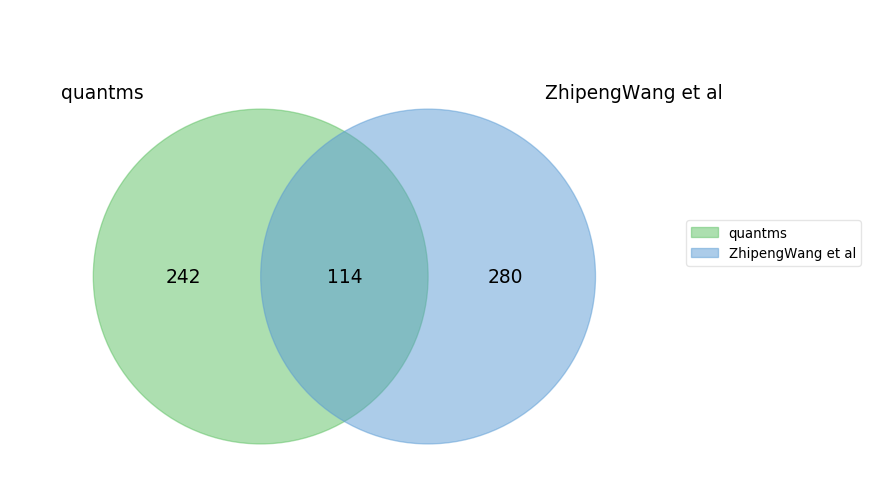

In [11]:
# pvalue <= 0.05 and |log2FC| >= 0.5

result = pd.read_csv('./LFQ/MBR/comparison_res.csv', sep=',')
result = result[['Protein', 'Label', 'log2FC', 'pvalue', 'adj.pvalue']].dropna()
result["-Log10(p-value)"] = -np.log10(result['pvalue'])
print(result.head())
result["ProteinEntry"] = result.apply(lambda x: ";".join(x.Protein.split("|")[1::2]), axis=1)

OrginalDEP = OriginalResultlfq[OriginalResultlfq["raw p-value <= 0.05"] == True]
quantms_dep = result[result['pvalue'] <= 0.05]

labels = venn.get_labels([set(quantms_dep['ProteinEntry']), set(OrginalDEP['Accession'])])
fig, ax = venn.venn2(labels, names=["quantms", "ZhipengWang et al"])
plt.show()

C:\Users\ChengXin\MyProgram\python\anaconda\pro\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in double_scalars


22.61629815220286
26.71155366262969
22.12789795425846
25.949561007487944


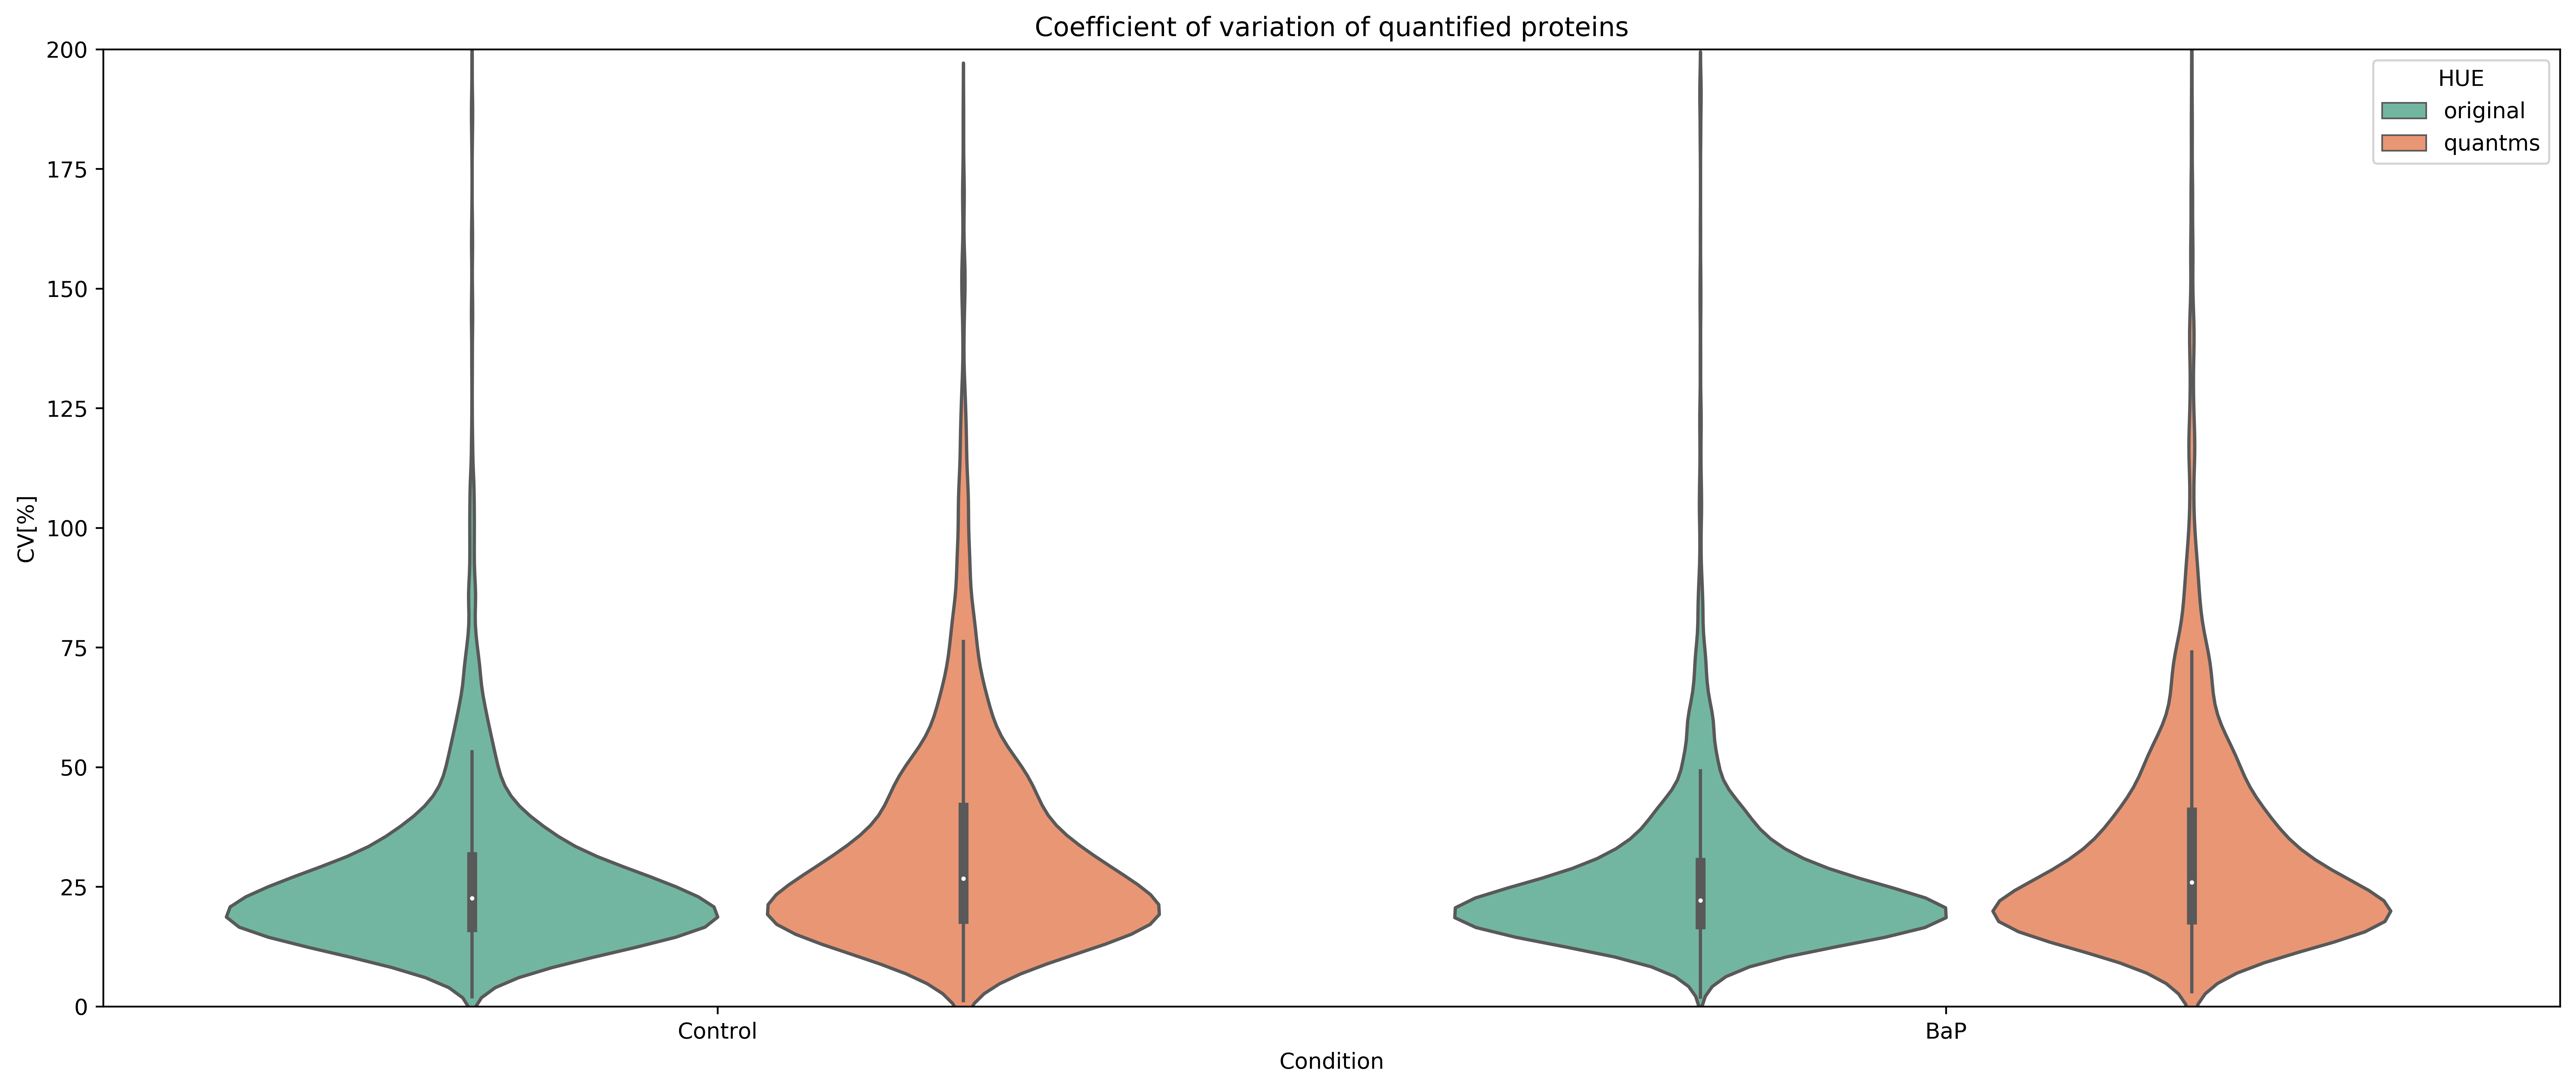

In [38]:
evidata = pd.read_csv("./LFQ/proteinGroups.txt", sep="\t", header=0)
evidata = evidata[(evidata['Potential contaminant'] != "+") & evidata['Reverse'] != "+"]
cv_data = evidata[['Intensity LFQ_DMSO_BP2', 'Intensity LFQ_DMSO_BP3', 'Intensity LFQ_DMSO_BP4', 
                   'Intensity LFQ_DMSO_BP5', 'Intensity LFQ_DMSO_BP6']]


cv_data.columns = ["BioRep2", "BioRep3", "BioRep4", "BioRep5", "BioRep6"]
cv_data = cv_data.copy()
cv_data['Condition'] = "Control"

temp = evidata[['Intensity LFQ_BaP_BP2', 'Intensity LFQ_BaP_BP3','Intensity LFQ_BaP_BP4', 'Intensity LFQ_BaP_BP5', 'Intensity LFQ_BaP_BP6']]
temp.columns = ["BioRep2", "BioRep3", "BioRep4", "BioRep5", "BioRep6"]
temp = temp.copy()
temp['Condition'] = "BaP"
cv_data = cv_data.append(temp)
cv_data = cv_data[(cv_data.T != 0).any()]
cv_data['CV[%]'] = cv_data.apply(lambda x: np.std(x[:5]) / np.mean(x[:5]) * 100, axis=1)
cv_data['HUE'] = "original"

# quantms
quantms_cv = pd.DataFrame(None,columns = ['BioRep2', 'BioRep3', 'BioRep4', 'BioRep5', 'BioRep6', 'Condition', "CV[%]", "HUE"])
quantmslfq_pca = quantmslfq[-quantmslfq['Reference'].str.contains("BP1")]

for condition, condition_group in quantmslfq_pca.groupby("Condition"):
    for name, group in condition_group.groupby("ProteinName"):
        t = []
        for _, group_biorep in group.groupby("BioReplicate"):
             t.append(np.sum(group_biorep['Intensity']))
        if len(t) < 5:
            continue
            
        std = np.std(t)
        mean = np.mean(t)
        quantms_cv = quantms_cv.append({
                       'BioRep2': t[0], 'BioRep3': t[1], 'BioRep4': t[2], 'BioRep5': t[3], 'BioRep6': t[4],
                       'Condition': condition, "CV[%]": 100 * (std / mean), "HUE": "quantms"}, ignore_index=True)

cv_data = cv_data.append(quantms_cv)
cv_data = cv_data[(cv_data['BioRep2'] !=0.0) & (cv_data['BioRep3'] !=0.0) &
                 (cv_data['BioRep4'] !=0.0) & (cv_data['BioRep5'] !=0.0) & (cv_data['BioRep6'] !=0.0)]

print(np.median(cv_data[(cv_data['HUE'] == "original") & (cv_data['Condition'] == "Control")]["CV[%]"]))
print(np.median(cv_data[(cv_data['HUE'] != "original") & (cv_data['Condition'] == "Control")]["CV[%]"]))
print(np.median(cv_data[(cv_data['HUE'] == "original") & (cv_data['Condition'] == "BaP")]["CV[%]"]))
print(np.median(cv_data[(cv_data['HUE'] != "original") & (cv_data['Condition'] == "BaP")]["CV[%]"]))

plt.figure(figsize=(20,8), dpi=500)
plt.ylim(0, 200)
plt.title("Coefficient of variation of quantified proteins")
sns.violinplot(x = "Condition", y="CV[%]", data=cv_data, scale= "count", palette="Set2", hue="HUE")

plt.show()

In [36]:
new_t.head()

,BioRep2,BioRep3,BioRep4,BioRep5,BioRep6,Condition,CV[%],HUE
0,5.772272e+08,360698060.0,411831850.0,739032040.0,459432111.0,BaP,28.024585,quantms
1,1.088848e+09,505476572.0,395175329.0,839620064.0,509706521.0,BaP,40.188867,quantms
2,6.338806e+08,483867545.0,340127400.0,760659720.0,542580982.0,BaP,30.054837,quantms
3,8.193938e+07,48950475.0,50370145.0,64849045.0,74868553.0,BaP,20.879165,quantms
4,3.902805e+07,16226669.0,27430774.0,82655924.0,30707040.0,BaP,67.522881,quantms


### TMT analysis

INFO  [2021-12-15 14:37:04] ** Raw data from OpenMS imported successfully.
INFO  [2021-12-15 14:37:06] ** Raw data from OpenMS cleaned successfully.
INFO  [2021-12-15 14:37:06] ** The following options are used:
  - Features will be defined by the columns: PeptideSequence, PrecursorCharge
  - Shared peptides will be removed.
  - Proteins with single feature will not be removed.
  - Features with less than 3 measurements within each run will be removed.
INFO  [2021-12-15 14:37:06] ** Features with all missing measurements across channels within each run are removed.
INFO  [2021-12-15 14:37:06] ** Shared peptides are removed.
INFO  [2021-12-15 14:37:07] ** Features with one or two measurements across channels within each run are removed.
INFO  [2021-12-15 14:37:16] ** PSMs have been aggregated to peptide ions.
INFO  [2021-12-15 14:37:19] ** For peptides overlapped between fractions of 1_1_1 use the fraction with maximal average abundance.
INFO  [2021-12-15 14:37:22] ** For peptides overl

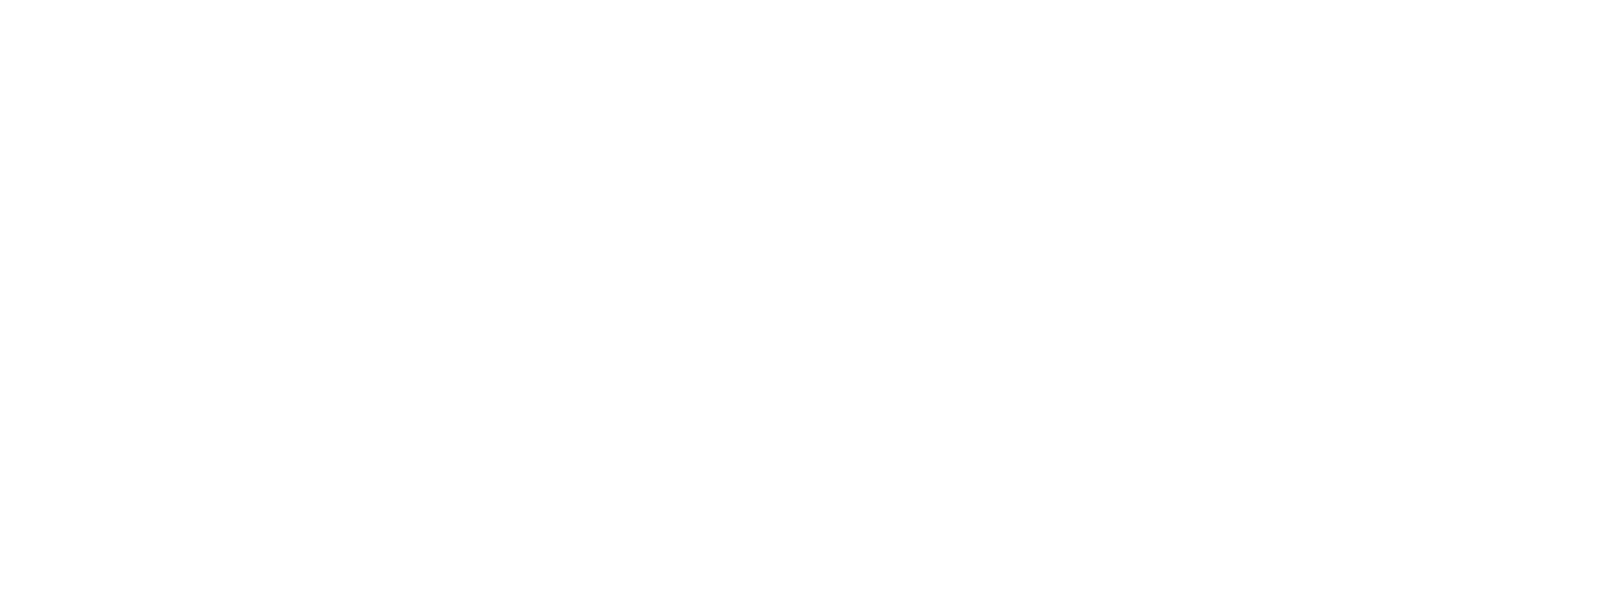

In [5]:
%%R -w 1600 -h 600

library('MSstatsTMT', warn.conflicts = F, quietly = T, verbose = F)
openms_output = './out_msstats.csv'
raw.om <- read.csv(openms_output, header = TRUE, sep = ',')
raw.om <- raw.om[!grepl("DECOY", raw.om$ProteinName),]
input.om <- OpenMStoMSstatsTMTFormat(raw.om)
head(input.om)

In [54]:
%%R

write.csv(input.om, "input_om.csv", sep=",", row.names=FALSE)

INFO  [2021-12-15 14:37:38] ** MSstatsTMT - proteinSummarization function
INFO  [2021-12-15 14:37:38] Summarizing for Run : 2_2_2 ( 1  of  2 )
  |======================================================================| 100%
INFO  [2021-12-15 14:38:49] Summarizing for Run : 1_1_1 ( 2  of  2 )
  |======================================================================| 100%
INFO  [2021-12-15 14:40:00] ** Protein-level summarization done by MSstats.


R[write to console]: Drew the Profile plot for 1 proteins.



  |======================================================================| 100%


R[write to console]: Drew the Profile plot with summarization for 1 proteins.



  |======================================================================| 100%


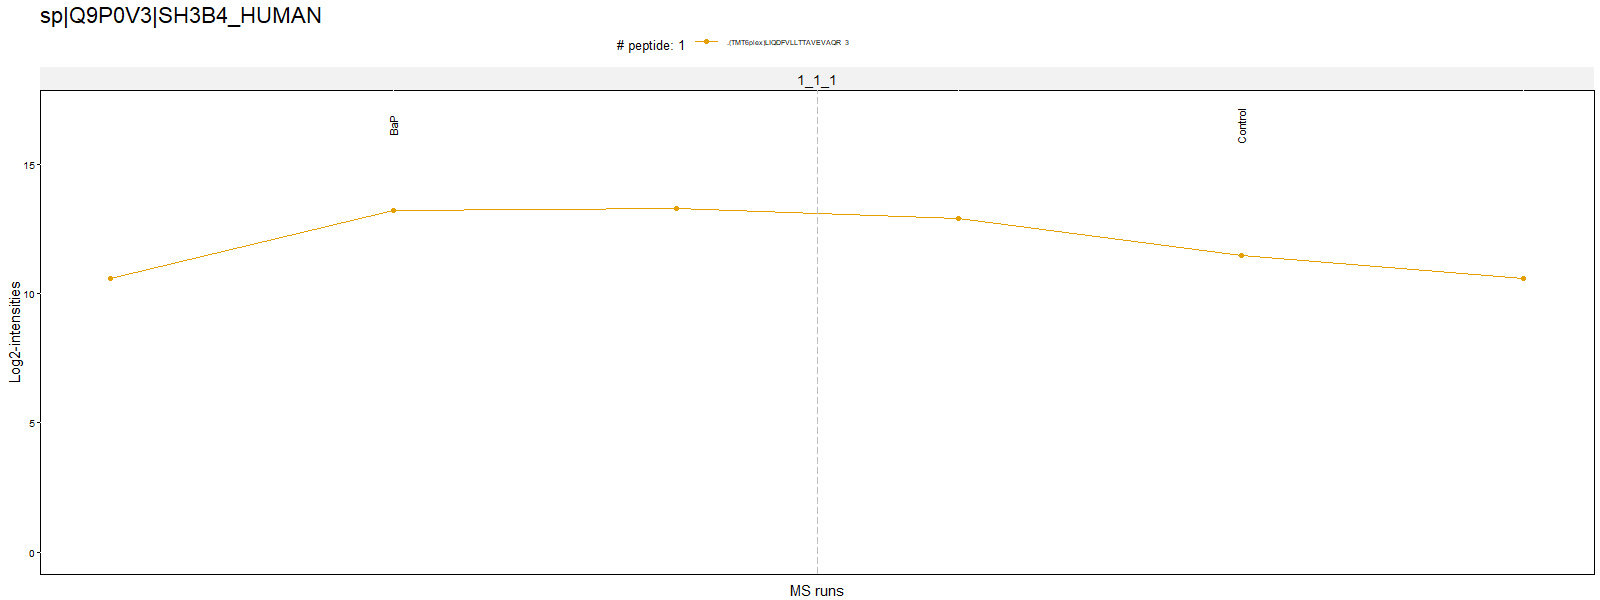

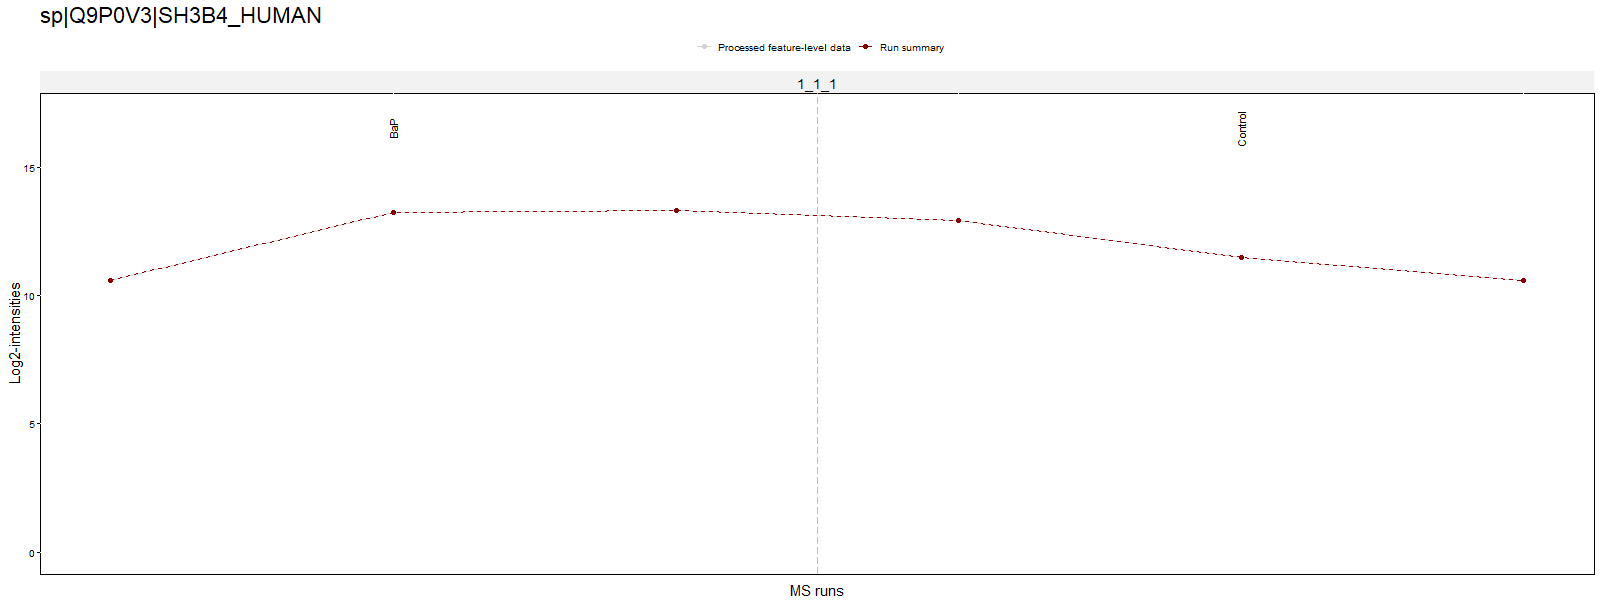

In [6]:
%%R -w 1600 -h 600

protein_expression = './protein_expression.csv'
# use MSstatsTMT for protein summarization
quant_om.msstats <- proteinSummarization(input.om,
                                      method="msstats",
                                      global_norm=TRUE,
                                      reference_norm=FALSE,
                                      remove_norm_channel = FALSE,
                                      remove_empty_channel = TRUE)

## Profile plot without norm channnels and empty channels
dataProcessPlotsTMT(data=quant_om.msstats,
                     type = 'ProfilePlot',
                     which.Protein = 'sp|Q9P0V3|SH3B4_HUMAN',
                     width = 25, # adjust the figure width 
                     height = 12,
                     address=FALSE)

TMTProtein.Expression <- quant_om.msstats$ProteinLevelData[, c('Protein', 'Abundance', 'BioReplicate', 'Condition')]
write.csv(TMTProtein.Expression, file=protein_expression, row.names=FALSE)

R[write to console]: Drew the Quality Contol plot(boxplot) over all proteins.



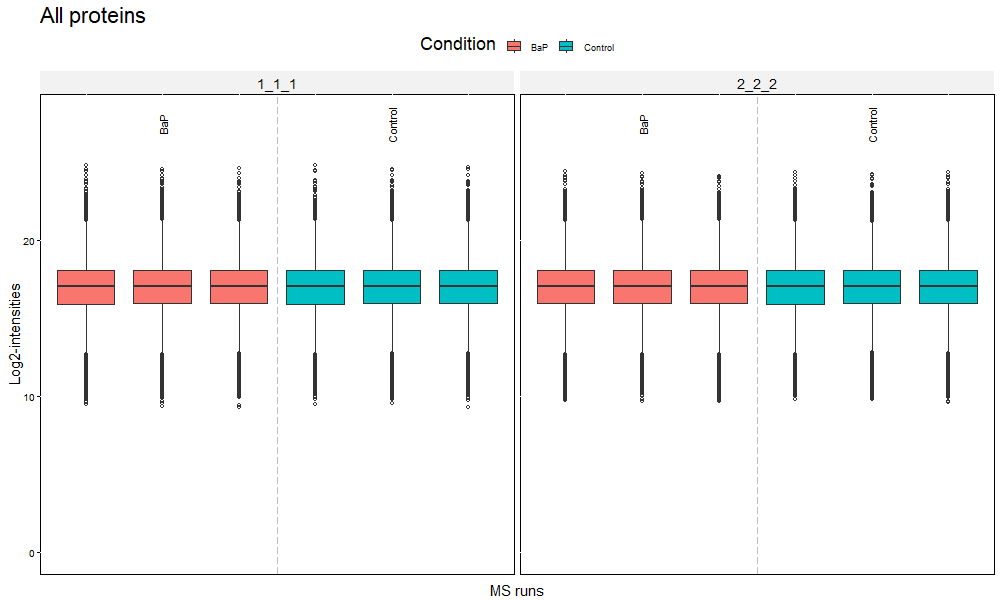

In [10]:
%%R -w 1000 -h 600

tmp <- levels(input.om$ProteinName)
selector <- append('allonly', tmp, 1)
## Quality control plot 
dataProcessPlotsTMT(data=quant_om.msstats, 
                     type='QCPlot',
                     which.Protein=selector,
                     width = 25, # adjust the figure width
                     height = 12,
                     address = FALSE)

In [8]:
%%R
head(quant_om.msstats$ProteinLevelData)
write.csv(quant_om.msstats$ProteinLevelData, "ProteinLevelData.csv", row.names=FALSE)

In [11]:
%%R

# Check the conditions in the protein level data
levels(quant_om.msstats$ProteinLevelData$Condition)

[1] "BaP"     "Control"


In [12]:
%%R -w 1000 -h 600

TMT_Comp<-matrix(c(1, -1), nrow=1)
row.names(TMT_Comp)<-c("BaP vs Control")
colnames(TMT_Comp) = c("BaP","Control")
TMT_Comp.pairwise <- groupComparisonTMT(quant_om.msstats, contrast.matrix = TMT_Comp, moderated = TRUE)
head(TMT_Comp.pairwise$ComparisonResult)

INFO  [2021-12-15 09:55:41] Model fitting for 4173 proteins.
  |======================================================================| 100%
INFO  [2021-12-15 09:58:09] Testing for 4173 proteins:
  |======================================================================| 100%
                                           Protein          Label      log2FC
1: sp|A0A0B4J2D5|GAL3B_HUMAN;sp|P0DPI2|GAL3A_HUMAN BaP vs Control -0.06142462
2:                           sp|A0AV96|RBM47_HUMAN BaP vs Control -0.06131260
3:                            sp|A0AVT1|UBA6_HUMAN BaP vs Control  0.05374643
4:                           sp|A0FGR8|ESYT2_HUMAN BaP vs Control  0.10607681
5:                           sp|A0MZ66|SHOT1_HUMAN BaP vs Control  0.03282189
6:                           sp|A1L0T0|HACL2_HUMAN BaP vs Control  0.12963690
           SE        DF    pvalue adj.pvalue issue
1: 0.08518732 11.457184 0.4853302  0.8140084    NA
2: 0.11599477  6.457183 0.6147669  0.8819528    NA
3: 0.03597977 12.457183 0

In [13]:
%%R

TMT_Comp = TMT_Comp.pairwise$ComparisonResult
write.table(TMT_Comp,"BaP_Control_Comp_result.csv",row.names=FALSE,col.names=TRUE,sep=",")

                                           Protein           Label    log2FC  \
0  sp|A0A0B4J2D5|GAL3B_HUMAN;sp|P0DPI2|GAL3A_HUMAN  BaP vs Control -0.061425   
1                            sp|A0AV96|RBM47_HUMAN  BaP vs Control -0.061313   
2                             sp|A0AVT1|UBA6_HUMAN  BaP vs Control  0.053746   
3                            sp|A0FGR8|ESYT2_HUMAN  BaP vs Control  0.106077   
4                            sp|A0MZ66|SHOT1_HUMAN  BaP vs Control  0.032822   

     pvalue  adj.pvalue  -Log10(p-value)  
0  0.485330    0.814008         0.313963  
1  0.614767    0.881953         0.211290  
2  0.160121    0.607026         0.795553  
3  0.190339    0.623795         0.720472  
4  0.667707    0.899919         0.175414  


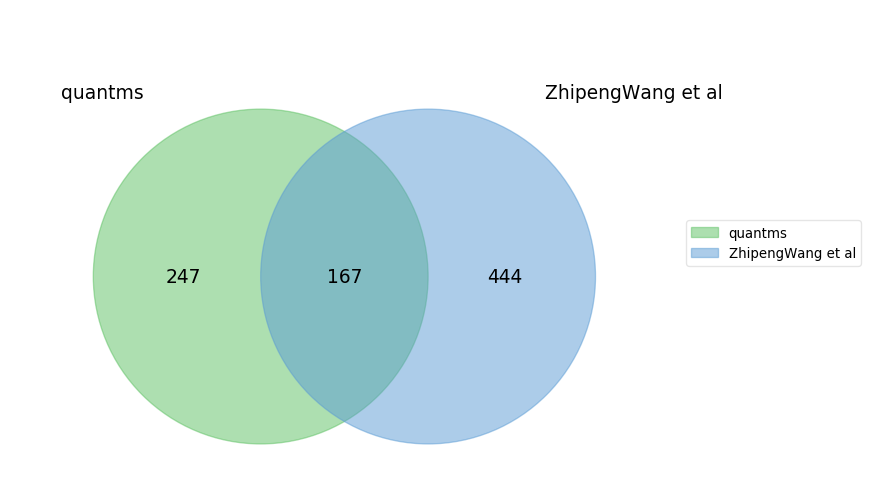

In [17]:
# pvalue <= 0.05 and |log2FC| >= 0.5

result = pd.read_csv('./BaP_Control_Comp_result.csv', sep=',')
result = result[['Protein', 'Label', 'log2FC', 'pvalue', 'adj.pvalue']].dropna()
result["-Log10(p-value)"] = -np.log10(result['pvalue'])
print(result.head())
result["ProteinEntry"] = result.apply(lambda x: ";".join(x.Protein.split("|")[1::2]), axis=1)

OrginalDEP = OriginalResult[OriginalResult["raw p-value <= 0.05"] == True]
quantms_dep = result[result['pvalue'] <= 0.05]

labels = venn.get_labels([set(quantms_dep['ProteinEntry']), set(OrginalDEP['Accession'])])
fig, ax = venn.venn2(labels, names=["quantms", "ZhipengWang et al"])
plt.show()

C:\Users\ChengXin\MyProgram\python\anaconda\pro\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in double_scalars


20.493597879486437
21.402657431847164
18.4621880901653
20.387650424759876


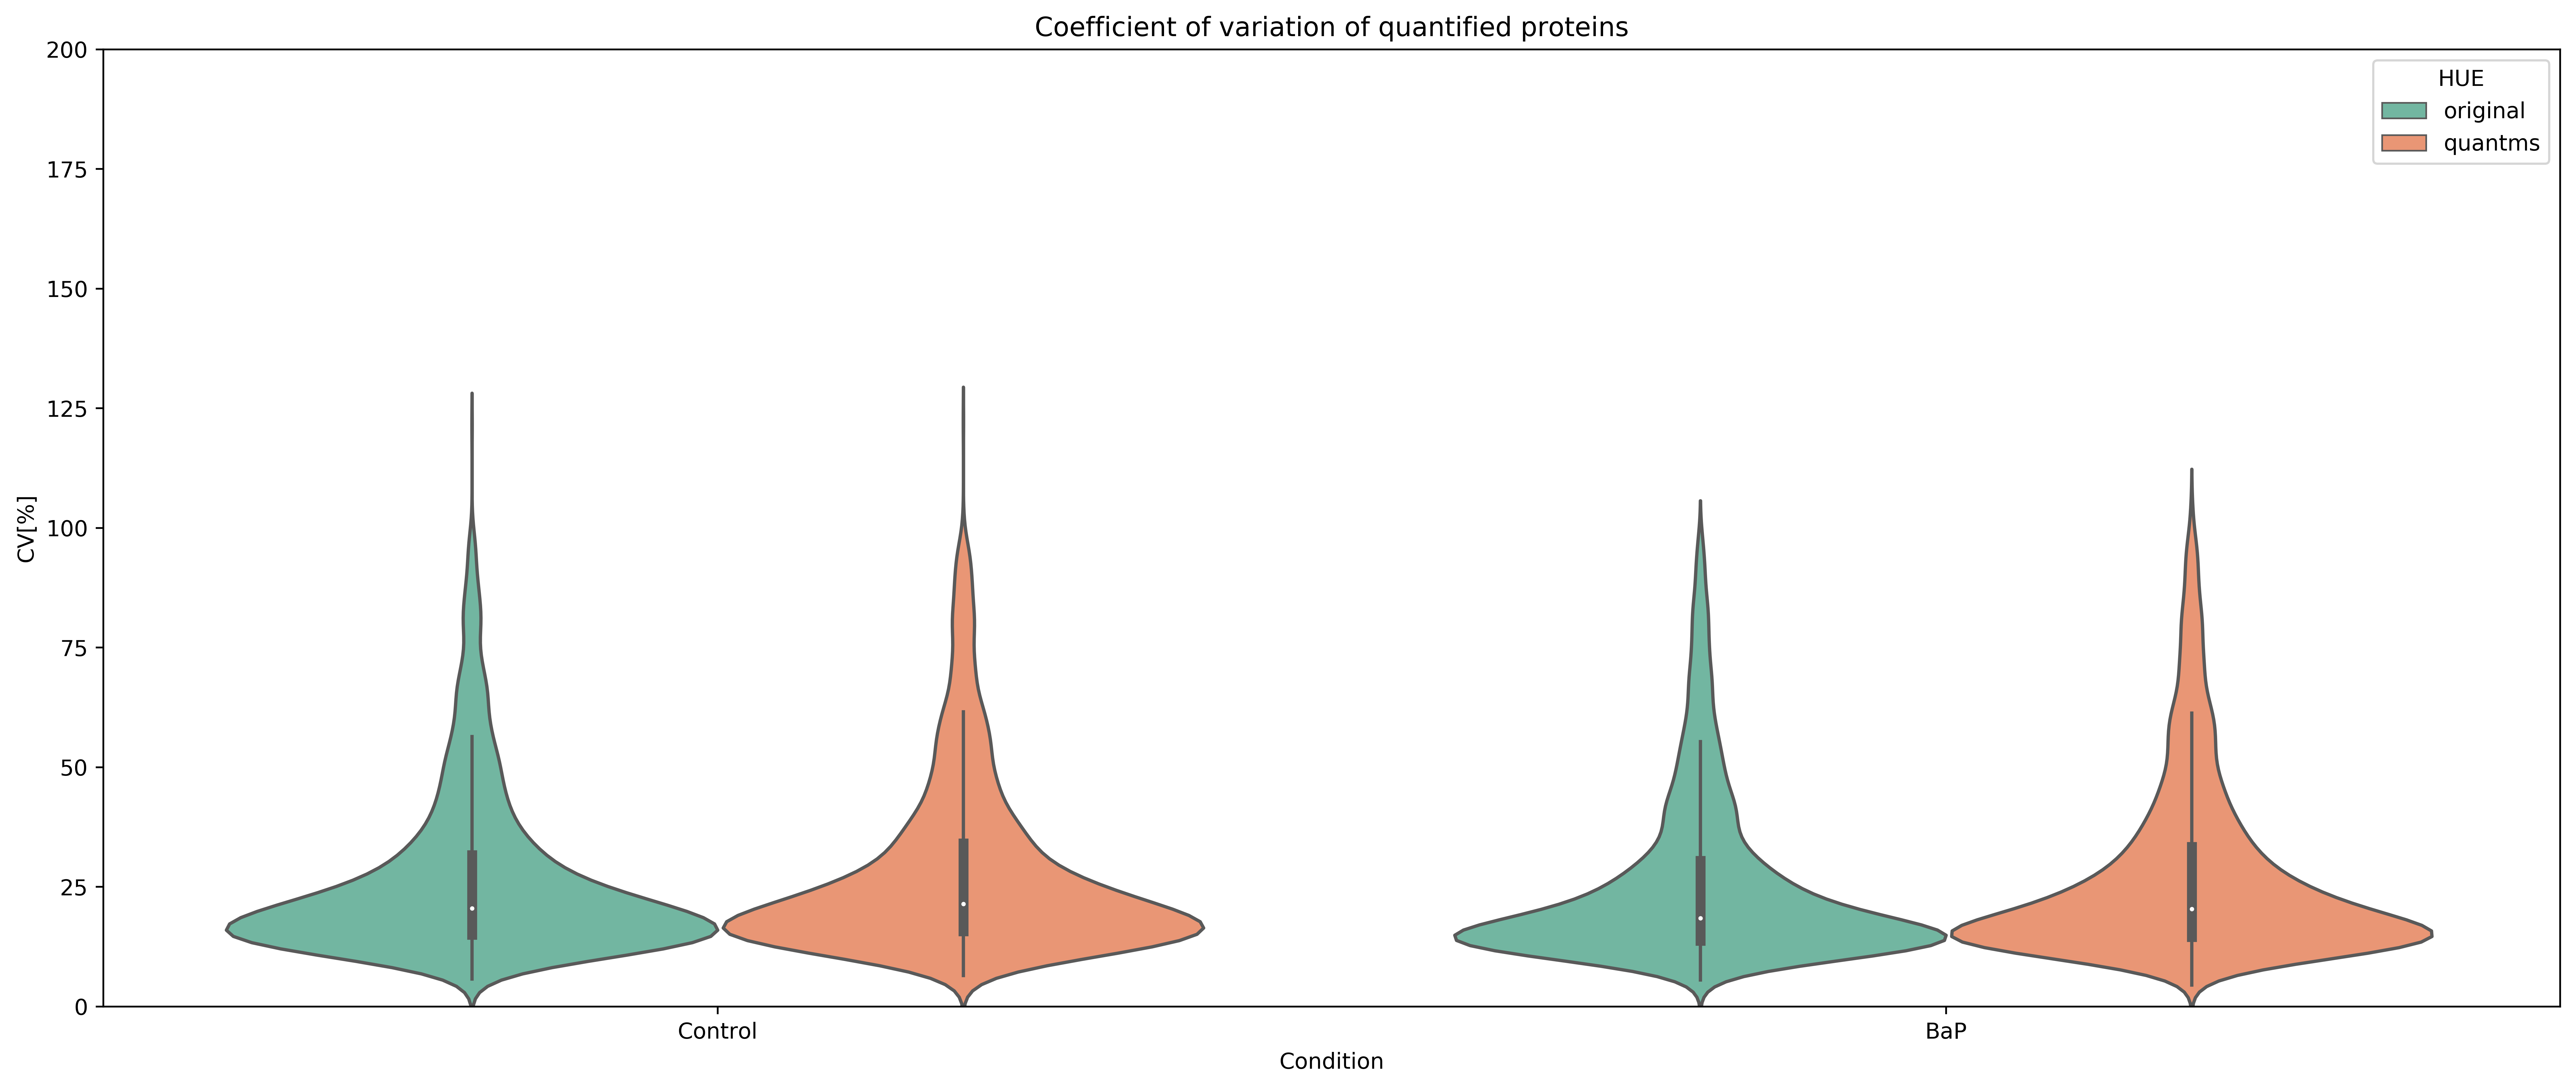

In [14]:
evidata = pd.read_csv("./TMT/proteinGroups.txt", sep="\t", header=0)
evidata = evidata[(evidata['Potential contaminant'] != "+") & evidata['Reverse'] != "+"]
cv_data = evidata[['Reporter intensity 1 TMT_BP123', 'Reporter intensity 2 TMT_BP123', 
                   'Reporter intensity 3 TMT_BP123', 'Reporter intensity 1 TMT_BP456',
                  'Reporter intensity 2 TMT_BP456', 'Reporter intensity 3 TMT_BP456']]
cv_data.columns = ["BioRep1", "BioRep2", "BioRep3", "BioRep4", "BioRep5", "BioRep6"]
cv_data = cv_data.copy()
cv_data['Condition'] = "Control"

temp = evidata[['Reporter intensity 4 TMT_BP123', 'Reporter intensity 5 TMT_BP123', 'Reporter intensity 6 TMT_BP123',
               'Reporter intensity 4 TMT_BP456', 'Reporter intensity 5 TMT_BP456', 'Reporter intensity 6 TMT_BP456']]
temp.columns = ["BioRep1", "BioRep2", "BioRep3", "BioRep4", "BioRep5", "BioRep6"]
temp = temp.copy()
temp['Condition'] = "BaP"

cv_data = cv_data.append(temp)
cv_data = cv_data[(cv_data.T != 0).any()]
cv_data['CV[%]'] = cv_data.apply(lambda x: np.std(x[:6]) / np.mean(x[:6]) * 100, axis=1)
cv_data['HUE'] = "original"

# quantms
quantms_proteindata = pd.read_csv("./TMT/input_om.csv", sep=",", header=0)
quantms_cv = pd.DataFrame(None,columns = ['BioRep1','BioRep2', 'BioRep3', 'BioRep4', 'BioRep5', 'BioRep6', 'Condition', "CV[%]", "HUE"])

for condition, condition_group in quantms_proteindata.groupby("Condition"):
    for name, group in condition_group.groupby("ProteinName"):
        t = []
        for _, group_biorep in group.groupby("BioReplicate"):
             t.append(np.sum(group_biorep['Intensity']))
        t +=[0] * (6 - len(t))
            
        std = np.std(t)
        mean = np.mean(t)
        quantms_cv = quantms_cv.append({'BioRep1': t[0], 
                       'BioRep2': t[1], 'BioRep3': t[2], 'BioRep4': t[3], 'BioRep5': t[4], 'BioRep6': t[5],
                       'Condition': condition, "CV[%]": 100 * (std / mean), "HUE": "quantms"}, ignore_index=True)
        
cv_data = cv_data.append(quantms_cv)
cv_data = cv_data[(cv_data['BioRep1'] !=0.0) & (cv_data['BioRep2'] !=0.0) & (cv_data['BioRep3'] !=0.0) &
                 (cv_data['BioRep4'] !=0.0) & (cv_data['BioRep5'] !=0.0) & (cv_data['BioRep6'] !=0.0)]

print(np.median(cv_data[(cv_data['HUE'] == "original") & (cv_data['Condition'] == "Control")]["CV[%]"]))
print(np.median(cv_data[(cv_data['HUE'] != "original") & (cv_data['Condition'] == "Control")]["CV[%]"]))
print(np.median(cv_data[(cv_data['HUE'] == "original") & (cv_data['Condition'] == "BaP")]["CV[%]"]))
print(np.median(cv_data[(cv_data['HUE'] != "original") & (cv_data['Condition'] == "BaP")]["CV[%]"]))

plt.figure(figsize=(20,8), dpi=500)
plt.ylim(0, 200)
plt.title("Coefficient of variation of quantified proteins")
sns.violinplot(x = "Condition", y="CV[%]", data=cv_data, scale= "count", palette="Set2", hue="HUE")

plt.show()

In [36]:
cv_data

,BioRep1,BioRep2,BioRep3,BioRep4,BioRep5,BioRep6,Condition,CV[%],HUE
0,2.037500e+05,2.901400e+05,2.475500e+05,2.283900e+05,235980.00,388530.00,Control,22.853700,original
1,8.960100e+03,1.051200e+04,1.059800e+04,7.402400e+03,6488.20,10243.00,Control,17.642192,original
3,1.873700e+05,2.138400e+05,1.832000e+05,2.164700e+05,222750.00,298980.00,Control,17.287946,original
5,2.155900e+05,2.902700e+05,2.379000e+05,2.112800e+05,193260.00,240500.00,Control,13.316150,original
6,1.091900e+04,1.574800e+04,1.476600e+04,3.224600e+03,2756.90,5816.00,Control,59.080001,original
...,...,...,...,...,...,...,...,...,...
8340,3.264837e+04,4.763027e+04,4.974154e+04,7.716611e+04,81059.15,105025.40,Control,37.305143,quantms
8341,1.755123e+05,1.936242e+05,1.609703e+05,2.810459e+05,312673.85,446215.62,Control,37.968795,quantms
8342,2.307453e+06,2.753099e+06,2.449262e+06,1.910721e+06,2006331.76,2924791.38,Control,15.313927,quantms
8343,3.004881e+05,3.656428e+05,3.389228e+05,2.382634e+05,232664.06,345103.70,Control,17.082934,quantms
